In [1]:
# Import McstasScript
from mcstasscript.interface import instr, plotter, functions

#my_configurator = functions.Configurator()

#my_configurator.set_mcxtrace_path("/Applications/McXtrace-1.5.app/Contents/Resources/mcxtrace/1.5/")
#my_configurator.set_mxrun_path("/Applications/McXtrace-1.5.app/Contents/Resources/mcxtrace/1.5/bin/")

In [2]:
# Create a McXtrace instrument
Instr = instr.McXtrace_instr("McXtrace_test",
                             author = "Mads Bertelsen",
                             origin = "ESS DMSC")

In [3]:
Instr.show_components()

Here are the available component categories:
 sources
 optics
 samples
 monitors
 misc
 contrib
 obsolete
Call show_components(category_name) to display


In [4]:
Instr.show_components("sources")

Here are all components in the sources category.
 Bending_magnet   Source_gaussian    Source_pt        Undulator
 Source_div       Source_genesis13   Source_simplex   Wiggler
 Source_flat      Source_lab         Source_spectra   


In [5]:
Instr.component_help("Source_flat")

 ___ Help Source_flat _______________________________________________________________
|optional parameter|required parameter|default value|user specified value|
spectrum_file = NULL
radius = 0.0 [m] // Radius of circle in (x,y,0) plane where x-rays are 
                    generated. 
yheight = 0.0 [m] // Height of rectangle in (x,y,0) plane where x-rays are 
                     generated. 
xwidth = 0.0 [m] // Width of rectangle in (x,y,0) plane where x-rays are 
                    generated. Overrides xmin and xmax. 
xmin = 0.0 [m] // Lower bound of x-interval where photons are generated.
xmax = 0.0 [m] // upper bound of x-interval where photons are generated.
dist = 0.0 [m] // Distance to target along z axis.
focus_xw = 0.045 [m] // Width of target
focus_yh = 0.12 [m] // Height of target
E0 = 0.0 [keV] // Mean energy of xrays.
dE = 0.0 [keV] // Energy half spread of x-rays (flat or gaussian sigma).
lambda0 = 0.0 [AA] // Mean wavelength of x-rays.
dlambda = 0.0 [AA] // Wavelength ha

In [6]:
src = Instr.add_component("source", "Source_flat")

In [7]:
src.xwidth = 0.01
src.yheight = 0.01

src.dist = 3.0
src.focus_xw = 0.001
src.focus_yh = 0.001

src.lambda0 = 0.3 
src.dlambda = 0.001

flux = 1E15

In [8]:
print(src)

COMPONENT source = Source_flat
  yheight = 0.01 [m]
  xwidth = 0.01 [m]
  dist = 3.0 [m]
  focus_xw = 0.001 [m]
  focus_yh = 0.001 [m]
  lambda0 = 0.3 [AA]
  dlambda = 0.001 [AA]
AT [0, 0, 0] ABSOLUTE



In [9]:
Instr.show_components("samples")

Here are all components in the samples category.
 Absorption_sample
 Molecule_2state
 Polycrystal
 PowderN
 SasView_model
 Saxs_spheres
 Single_crystal


In [10]:
Instr.component_help("PowderN")

 ___ Help PowderN ___________________________________________________________________
|optional parameter|required parameter|default value|user specified value|
format = Undefined [ ] // Name of the format, or list of column indexes (see 
                          Description). N.b. no qoutes! 
mat_format = mat_Undefined
reflections = 0 // Input file for reflections.
material = 0
geometry = 0 [str] // Name of an Object File Format (OFF) or PLY file for 
                      complex geometry. The OFF/PLY file may be generated from XYZ 
                      coordinates using qhull/powercrust. 
radius = 0.0 [m]
yheight = 0.0 [m]
xwidth = 0.0 [m]
zdepth = 0.0 [m]
thickness = 0.0 // Thickness of hollow sample.
pack = 1.0 [1] // Packing factor
Vc = 0.0 [AA^3] // Volume of unit cell=nb atoms per cell/density of atoms.
Delta_d = 0.0 [AA] // Global relative Delta_d/d spreading when the 'w' column 
                      is not available. Use 0 if ideal. 
p_inc = 0.1 [1] // Fraction of incohere

In [11]:
sample = Instr.add_component("powder", "PowderN")

In [12]:
sample.set_AT([0,0, src.dist], RELATIVE=src)
#sample.reflections = '"Ga.txt"'
sample.yheight = src.focus_yh
sample.radius = 0.5*src.focus_xw

sample.reflections = '"Fe_bcc229_lt13deg.dat"'
sample.format="Crystallographica"
sample.material = '"Fe.txt"'
sample.pack = 0.5
sample.Vc = 123
sample.p_inc = 0
sample.p_transmit = 0.1

In [13]:
Instr.show_components("monitors")

Here are all components in the monitors category.
 DivE_monitor         E_monitor    PSD_monitor       PreMonitor_nD
 DivPos_monitor       L_monitor    PSD_monitor_4PI   TOF_monitor
 Divergence_monitor   Monitor      PSD_monitor_coh   W_psd_monitor
 EPSD_monitor         Monitor_nD   Phi_monitor       


In [14]:
Instr.component_help("PSD_monitor")

 ___ Help PSD_monitor _______________________________________________________________
|optional parameter|required parameter|default value|user specified value|
filename = 0 [1] // Name of file in which to store the detector image.
xmin = -0.05 [m] // Lower x bound of detector opening
xmax = 0.05 [m] // Upper x bound of detector opening
ymin = -0.05 [m] // Lower y bound of detector opening
ymax = 0.05 [m] // Upper y bound of detector opening
xwidth = 0.0 [m] // Width of detector. Overrides xmin,xmax.
yheight = 0.0 [m] // Height of detector. Overrides ymin,ymax.
radius = 0.0 [m] // Radius of circular detetor.
restore_xray = 1.0 [1] // If set, the monitor does not influence the xray state.
nowritefile = 0 [1] // If set, monitor will skip writing to disk
nx = 90 [1] // Number of pixel columns.
ny = 90 [1] // Number of pixel rows.
nr = 0 [1] // Number of radial pixels.
-------------------------------------------------------------------------------------


In [15]:
psd = Instr.add_component("psd", "PSD_monitor")

In [16]:
psd.filename = '"data.dat"'
psd.xwidth = 2.0
psd.yheight = 2.0
psd.nx = 1000
psd.ny = 1000
psd.set_AT([0,0,2.0], RELATIVE=sample)

In [17]:
data = Instr.run_full_instrument(foldername="mcxtrace_data", increment_folder_name=True)

/usr/share/mcxtrace/1.5/tools/Python/mxrun/mccode.py:200: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if val is not None and val is not '':
INFO: Using directory: "/home/jovyan/mcxtrace_data_2"
INFO: Regenerating c-file: McXtrace_test.c
         may be changed into a setting parameter to avoid
         warnings at compile time.
CFLAGS=
INFO: Recompiling: ./McXtrace_test.out
/usr/share/mcxtrace/1.5/tools/Python/mxrun/../mccodelib/../../../samples/PowderN.comp: In function ‘off_init’:
/usr/share/mcxtrace/1.5/tools/Python/mxrun/../mccodelib/../../../samples/PowderN.comp:869:7: warning: ignoring return value of ‘fgets’, declared with attribute warn_unused_result [-Wunused-result]
  869 |       }
      |       ^                              
/usr/share/mcxtrace/1.5/tools/Python/mxrun/../mccodelib/../../../samples/PowderN.comp:956:7: warning: ignoring return value of ‘fgets’, declared with attribute warn_unused_result [-Wunused-result]
  956 |             arg = line_info.q[l

In [18]:
print(data)

[
McStasData: psd type: 2D  I:8.8323e-09 E:2.79126e-11 N:380652]


Plotting data with name psd


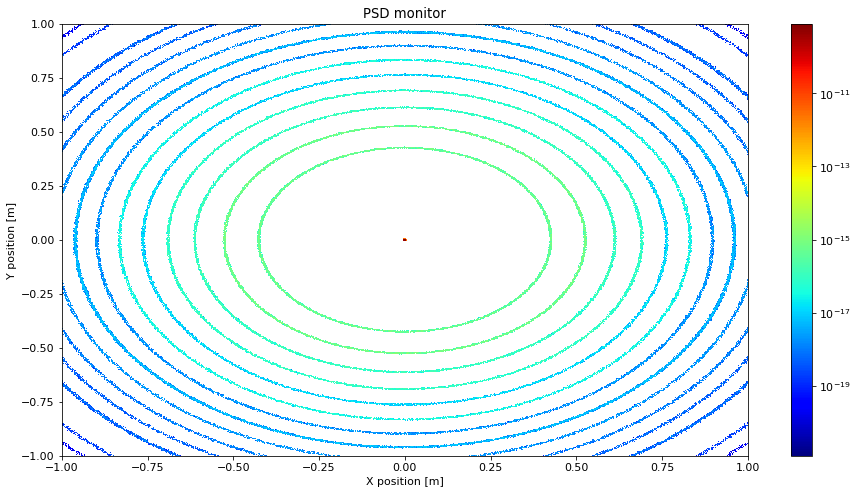

In [19]:
data[0].set_plot_options(log=True)
plotter.make_sub_plot(data)